In [1]:
import pandas as pd
import os

# Set the path to the folder containing the txt files
folder_path = os.path.join('src', 'data', 'ecb-speeches')

# List all txt files in the folder
txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['date', 'content'])

# Iterate through the txt files and read their content
for txt_file in txt_files:
    # Extract the date from the file name
    date_str = txt_file.split('_')[0]
    date = pd.to_datetime(date_str, format='%Y-%m-%d')
    
    # Read the content of the file
    with open(os.path.join(folder_path, txt_file), 'r') as file:
        content = file.read()
    
    # Append the date and content to the DataFrame
    df = pd.concat([df, pd.DataFrame({'date': [date], 'content': [content]})], ignore_index=True)

# Sort the DataFrame by date
df = df.sort_values(by='date').reset_index(drop=True)


In [3]:
df

,date,content
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...
1,1998-09-18,Mr. Duisenberg’s opening statement at the meet...
2,1998-10-12,Mr. Duisenberg's statement to the European Par...
3,1998-10-12,Mr. Duisenberg speaks on changes in European f...
4,1998-10-22,Mr. Duisenberg’s opening statement at the pres...
...,...,...
2270,2022-02-18,012234\n\n56789 6ÿ6ÿÿ69ÿ96ÿÿ...
2271,2022-02-23,Frank Elderson: Towards an immersive superviso...
2272,2022-02-23,Frank Elderson: Prudential pathways to Paris\n...
2273,2022-02-23,


In [4]:
# Set the path to the output CSV file
output_file = os.path.join('src', 'output', 'data.csv')

# Save the DataFrame to a CSV file
df.to_csv(output_file, index=False)


In [18]:
# Set the path to the input CSV file
input_file = os.path.join('src', 'output', 'data.csv')

# Read the CSV file into a DataFrame
df_main = pd.read_csv(input_file)

# Display the first 20 rows of the DataFrame
df_main.head(20)

,date,content
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...
1,1998-09-18,Mr. Duisenberg’s opening statement at the meet...
2,1998-10-12,Mr. Duisenberg's statement to the European Par...
3,1998-10-12,Mr. Duisenberg speaks on changes in European f...
4,1998-10-22,Mr. Duisenberg’s opening statement at the pres...
5,1998-11-09,Mr. Duisenberg’s opening statement at the pres...
6,1998-11-26,Mr. Duisenberg looks at the international role...
7,1998-12-03,Mr Duisenberg reports on the current position ...
8,1999-01-08,Mr Duisenberg’s opening statement at the press...
9,1999-01-11,Mr Duisenberg’s opening statement at the press...


In [6]:
text = df.iloc[0,1]
text

'Mr. Duisenberg reports on the outcome of the second meeting of the Governing\nCouncil of the European Central Bank Introductory statement by the President of the European\nCentral Bank, Dr. W. Duisenberg, at the press conference held in Frankfurt on 8/7/98.\n\nThe Governing Council first assessed current economic developments in the euro\narea. The general picture is one of continued economic expansion combined with broadly low\ninflation.\nSeveral forecasts made during spring 1998 have even suggested slightly lower\nrates of inflation for 1998-99 compared with expectations in autumn 1997. As far as price\ndevelopments are concerned, inflation as measured by the harmonised consumer price index\n(HICP) is estimated to have risen slightly in April, to 1.4%, but has not increased further in May.\nOutput growth has remained strong in recent quarters, with annual growth rates\nclose to or even exceeding 3%. Economic growth has been driven increasingly by domestic\ndemand rather than net ex

In [7]:
import nltk
nltk.download('punkt')

from transformers import pipeline

[nltk_data] Downloading package punkt to /home/ozodbek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
classifier = pipeline(
    "text-classification", model="distilbert-base-uncased-finetuned-sst-2-english"
)
paragraph = df.iloc[0,1]

max_len = 512
paragraph

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


'Mr. Duisenberg reports on the outcome of the second meeting of the Governing\nCouncil of the European Central Bank Introductory statement by the President of the European\nCentral Bank, Dr. W. Duisenberg, at the press conference held in Frankfurt on 8/7/98.\n\nThe Governing Council first assessed current economic developments in the euro\narea. The general picture is one of continued economic expansion combined with broadly low\ninflation.\nSeveral forecasts made during spring 1998 have even suggested slightly lower\nrates of inflation for 1998-99 compared with expectations in autumn 1997. As far as price\ndevelopments are concerned, inflation as measured by the harmonised consumer price index\n(HICP) is estimated to have risen slightly in April, to 1.4%, but has not increased further in May.\nOutput growth has remained strong in recent quarters, with annual growth rates\nclose to or even exceeding 3%. Economic growth has been driven increasingly by domestic\ndemand rather than net ex

In [26]:
sentiments = []
for chunk in nltk.sent_tokenize(paragraph):
    if len(chunk) <= max_len:
        sentiment = classifier(chunk)[0]
    else:
        subchunks = [chunk[i:i+max_len] for i in range(0, len(chunk), max_len)]
        sentiment = sum(classifier(subchunk)[0]['score'] for subchunk in subchunks) / len(subchunks)
        sentiment = {'label': None, 'score': sentiment}
    sentiments.append({"label": sentiment["label"], "score": sentiment["score"]})

sentiment_single = pd.DataFrame(sentiments) 



In [32]:
sentiments = []

for chunk in nltk.sent_tokenize(paragraph):
    if len(chunk) <= max_len:
        sentiment = classifier(chunk)[0]
    else:
        subchunks = [chunk[i:i+max_len] for i in range(0, len(chunk), max_len)]
        sentiment_scores = [classifier(subchunk)[0] for subchunk in subchunks]

        sentiment_probs = {
            'positive': sum(score['score'] for score in sentiment_scores if score['label'] == 'POSITIVE') / len(sentiment_scores),
            'negative': sum(score['score'] for score in sentiment_scores if score['label'] == 'NEGATIVE') / len(sentiment_scores),
            'neutral': sum(score['score'] for score in sentiment_scores if score['label'] == 'NEUTRAL') / len(sentiment_scores)
        }
        
        sentiments.append(sentiment_probs)

sentiments_df = pd.DataFrame(sentiments)
sentiments_df

,positive,negative,neutral
0,0.929381,0.0,0.0


## functional way

In [33]:
max_chunk_length = 512

# Function to split the text into chunks based on the maximum length



In [36]:
from functions import calculate_sentiment_distilbert

# Apply the sentiment analysis function to the 'content' column for the first 10 rows
df[['positive', 'negative']] = df['content'].head(10).apply(lambda x: pd.Series(calculate_sentiment_distilbert(x)))

# Optional: Calculate the neutral sentiment as the remaining probability
df['neutral'] = 1 - df['positive'] - df['negative']

# Print the updated DataFrame
print(df.head(10))


         date                                            content  positive  \
0  1998-07-17  Mr. Duisenberg reports on the outcome of the s...  0.919809   
1  1998-09-18  Mr. Duisenberg’s opening statement at the meet...  0.923082   
2  1998-10-12  Mr. Duisenberg's statement to the European Par...  0.937607   
3  1998-10-12  Mr. Duisenberg speaks on changes in European f...  0.983358   
4  1998-10-22  Mr. Duisenberg’s opening statement at the pres...  0.921027   
5  1998-11-09  Mr. Duisenberg’s opening statement at the pres...  0.938890   
6  1998-11-26  Mr. Duisenberg looks at the international role...  0.901040   
7  1998-12-03  Mr Duisenberg reports on the current position ...  0.951739   
8  1999-01-08  Mr Duisenberg’s opening statement at the press...  0.939825   
9  1999-01-11  Mr Duisenberg’s opening statement at the press...  0.960138   

   negative  neutral  
0  0.080191      0.0  
1  0.076918      0.0  
2  0.062393      0.0  
3  0.016642      0.0  
4  0.078973      0.0  
5  

In [38]:
# Define the start and end dates of the desired date range
start_date = '2008-09-01'
end_date = '2008-09-31'

# Filter the DataFrame based on the date range
subset_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Apply the sentiment analysis function to the 'content' column for the subset
subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_distilbert(x)))

# Optional: Calculate the neutral sentiment as the remaining probability
subset_df['neutral'] = 1 - subset_df['positive'] - subset_df['negative']

# Print the updated subset DataFrame
print(subset_df)


           date                                            content  positive  \
544  2008-09-03  Gertrude Tumpel-Gugerell: Start of the ECB/ESC...  0.963037   
545  2008-09-04  Gertrude Tumpel-Gugerell: Moving ahead with th...  0.966540   
546  2008-09-09  Jürgen Stark: Monetary policy during the finan...  0.945536   
547  2008-09-09  José Manuel González-Páramo: Globalisation, ma...  0.938008   
548  2008-09-09  European Central Bank: Press conference – intr...  0.946911   
549  2008-09-09  Jean-Claude Trichet: Risk and the macro-econom...  0.937131   
550  2008-09-10  Gertrude Tumpel-Gugerell: What is the role of ...  0.967686   
551  2008-09-10  Jürgen Stark: Economic perspectives and moneta...  0.953227   
552  2008-09-11  Gertrude Tumpel-Gugerell: SEPA for cards\nSpee...  0.929444   
553  2008-09-11  José Manuel González-Páramo: Some lessons from...  0.954075   
554  2008-09-11  Jean Claude-Trichet: Hearing before the Econom...  0.896816   
555  2008-09-15  Gertrude Tumpel-Gugerel

/tmp/ipykernel_21425/4236558870.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_scores(x)))
/tmp/ipykernel_21425/4236558870.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['neutral'] = 1 - subset_df['positive'] - subset_df['negative']


In [42]:
from functions import split_text


In [43]:
sentiments_2 = split_text(text = text, max_words=512)
sentiments_2

['Mr. Duisenberg reports on the outcome of the second meeting of the Governing\nCouncil of the European Central Bank Introductory statement by the President of the European\nCentral Bank, Dr. W. Duisenberg, at the press conference held in Frankfurt on 8/7/98.\n\nThe Governing Council first assessed current economic developments in the euro\narea. The general picture is one of continued economic expansion combined with broadly low\ninflation.\nSeveral forecasts made during spring 1998 have even suggest',
 'ed slightly lower\nrates of inflation for 1998-99 compared with expectations in autumn 1997. As far as price\ndevelopments are concerned, inflation as measured by the harmonised consumer price index\n(HICP) is estimated to have risen slightly in April, to 1.4%, but has not increased further in May.\nOutput growth has remained strong in recent quarters, with annual growth rates\nclose to or even exceeding 3%. Economic growth has been driven increasingly by domestic\ndemand rather than 

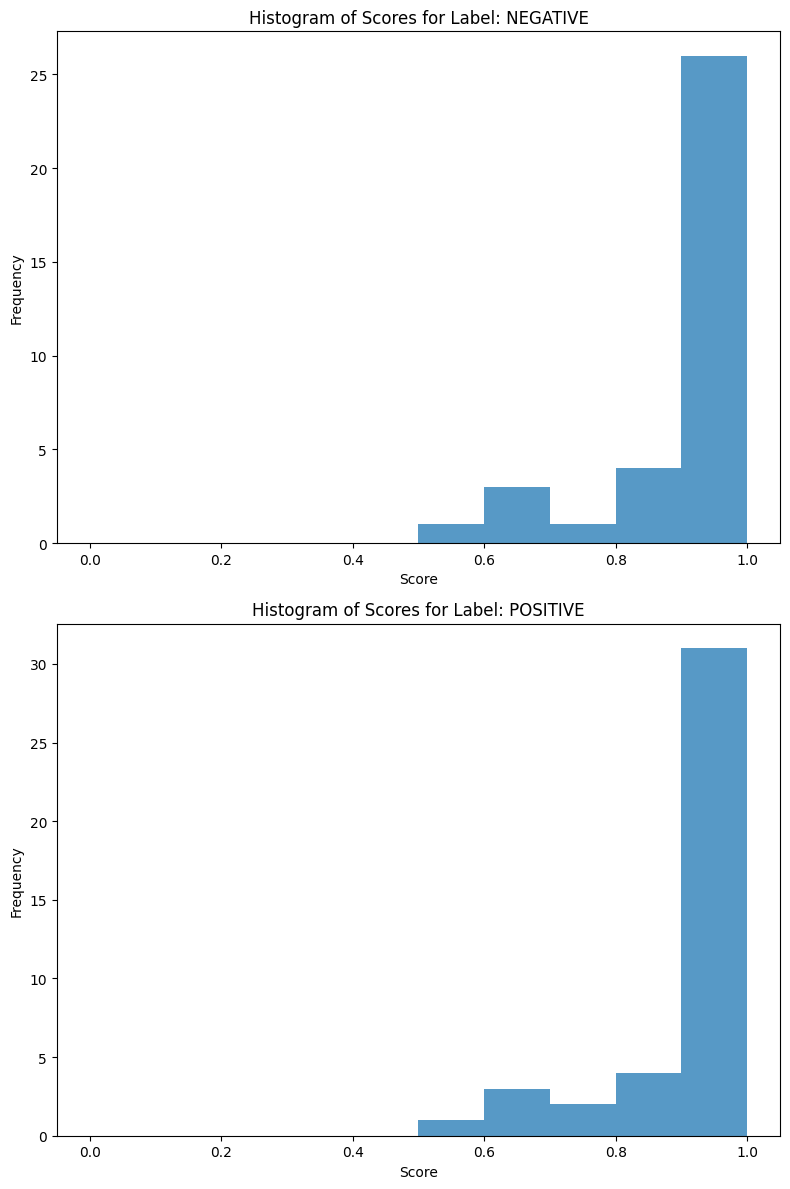

In [10]:
import matplotlib.pyplot as plt

# Group the DataFrame by label
label_groups = sentiments_df.groupby('label')

# Determine the number of subplots based on the number of label groups
num_subplots = len(label_groups)

# Create a figure with subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 6 * num_subplots))

# Iterate over each label group and plot a histogram in a separate subplot
for i, (label, group) in enumerate(label_groups):
    axs[i].hist(group['score'], bins=10, range=(0, 1), alpha=0.75)
    axs[i].set_xlabel('Score')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of Scores for Label: {label}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


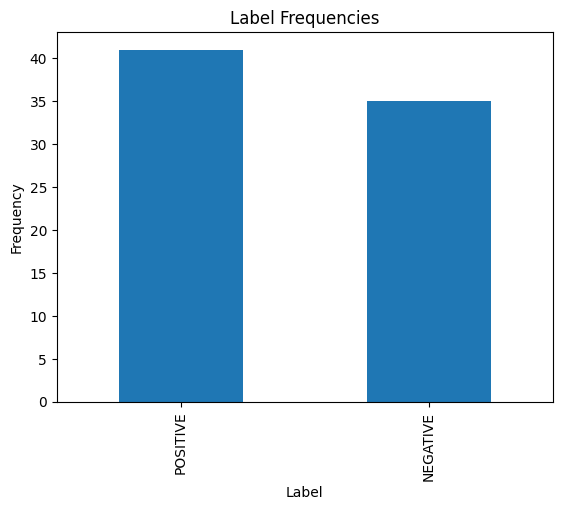

In [11]:
import matplotlib.pyplot as plt

# Extract the scores from the sentiments dataframe
labels = sentiments_df['label'].value_counts()

# Create a histogram of the scores
labels.plot.bar()
plt.title('Label Frequencies')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()


# Get started with FinBERT

In [3]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

In [4]:
# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')


In [14]:
from functions import split_text
from functions import calculate_sentiment_finbert

In [15]:
# Apply the sentiment analysis function to the 'content' column for the first N rows

N=2
subset = df_main.head(N)
subset[['positive', 'negative']] = subset['content'].head(2).apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))

# Optional: Calculate the neutral sentiment as the remaining probability
subset['neutral'] = 1 - subset['positive'] - subset['negative']

In [16]:
# Print the updated DataFrame
df.head(2)

,date,content,positive,negative,neutral
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...,0.723710,0.253094,0.023196
1,1998-09-18,Mr. Duisenberg’s opening statement at the meet...,0.567524,0.153057,0.279419


In [19]:
# Define the start and end dates of the desired date range
start_date = '2008-09-01'
end_date = '2008-09-31'

# Filter the DataFrame based on the date range
subset_df = df_main[(df_main['date'] >= start_date) & (df_main['date'] <= end_date)]

# Apply the sentiment analysis function to the 'content' column for the subset
subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))

# Optional: Calculate the neutral sentiment as the remaining probability
subset_df['neutral'] = 1 - subset_df['positive'] - subset_df['negative']

# Print the updated subset DataFrame
subset_df


/tmp/ipykernel_28678/966850476.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_28678/966850476.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_28678/966850476.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,date,content,positive,negative,neutral
544,2008-09-03,Gertrude Tumpel-Gugerell: Start of the ECB/ESC...,0.512358,0.475744,0.011898
545,2008-09-04,Gertrude Tumpel-Gugerell: Moving ahead with th...,0.706775,0.158858,0.134368
546,2008-09-09,Jürgen Stark: Monetary policy during the finan...,0.579697,0.300432,0.119871
547,2008-09-09,"José Manuel González-Páramo: Globalisation, ma...",0.531841,0.311069,0.157090
548,2008-09-09,European Central Bank: Press conference – intr...,0.211059,0.298317,0.490624
549,2008-09-09,Jean-Claude Trichet: Risk and the macro-econom...,0.546601,0.188120,0.265279
550,2008-09-10,Gertrude Tumpel-Gugerell: What is the role of ...,0.863387,0.116412,0.020201
551,2008-09-10,Jürgen Stark: Economic perspectives and moneta...,0.378338,0.326889,0.294773
552,2008-09-11,Gertrude Tumpel-Gugerell: SEPA for cards\nSpee...,0.734531,0.219945,0.045524
553,2008-09-11,José Manuel González-Páramo: Some lessons from...,0.513097,0.367064,0.119839


In [20]:
# save the data in parquet format
subset_df.to_parquet('src/output/finbert_sentiment_test.parquet')

In [21]:
subset_df = pd.read_parquet('src/output/finbert_sentiment_test.parquet')
subset_df

,date,content,positive,negative,neutral
544,2008-09-03,Gertrude Tumpel-Gugerell: Start of the ECB/ESC...,0.512358,0.475744,0.011898
545,2008-09-04,Gertrude Tumpel-Gugerell: Moving ahead with th...,0.706775,0.158858,0.134368
546,2008-09-09,Jürgen Stark: Monetary policy during the finan...,0.579697,0.300432,0.119871
547,2008-09-09,"José Manuel González-Páramo: Globalisation, ma...",0.531841,0.311069,0.157090
548,2008-09-09,European Central Bank: Press conference – intr...,0.211059,0.298317,0.490624
549,2008-09-09,Jean-Claude Trichet: Risk and the macro-econom...,0.546601,0.188120,0.265279
550,2008-09-10,Gertrude Tumpel-Gugerell: What is the role of ...,0.863387,0.116412,0.020201
551,2008-09-10,Jürgen Stark: Economic perspectives and moneta...,0.378338,0.326889,0.294773
552,2008-09-11,Gertrude Tumpel-Gugerell: SEPA for cards\nSpee...,0.734531,0.219945,0.045524
553,2008-09-11,José Manuel González-Páramo: Some lessons from...,0.513097,0.367064,0.119839


# Topic modeling


In [51]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [58]:
# load the data and convert the content column to list
df_topic = pd.read_parquet('src/output/finbert_sentiment_test.parquet')
subset = df_topic.head(10)
documents = subset['content'].tolist()


In [59]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the documents into a document-term matrix
dtm = vectorizer.fit_transform(documents)

In [65]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5)

# Apply TF-IDF vectorization to the documents
tfidf_matrix = vectorizer.fit_transform(df['content'])

# Apply LSA (Truncated SVD)
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

# Get the feature names (i.e., the terms) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# For each topic, print the top words
for topic_idx, topic in enumerate(lsa_model.components_):
    print(f"Topic {topic_idx + 1}:")
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(", ".join(top_words))
    print()


Topic 1:
inflation, price, rates, crisis, fiscal, rate, risk, measures, banking, risks

Topic 2:
inflation, price, annual, medium, rates, governing, developments, outlook, quarter, prices

Topic 3:
price, integration, developments, currency, 1999, banknotes, labour, eurosystem, review, single

Topic 4:
liquidity, risk, supervisory, prudential, banking, credit, risks, supervision, systemic, macro

Topic 5:
payments, payment, sepa, retail, integration, inflation, services, instant, digital, pandemic

Topic 6:
liquidity, price, international, review, 2007, global, risk, 2008, 2009, rate

Topic 7:
labour, productivity, integration, capital, reforms, structural, global, 2006, eu, firms

Topic 8:
inflation, supervisory, ssm, supervision, banking, price, single, resolution, strategy, prudential

Topic 9:
pandemic, 2020, pepp, 2021, fiscal, currency, eurosystem, eu, international, emu

Topic 10:
pandemic, climate, global, 2020, prudential, risks, esrb, macroprudential, macro, 2021



# Data pipeline for other stock data


In [23]:
import pandas as pd
!pip install yfinance
import yfinance as yf

  Using cached yfinance-0.2.22-py2.py3-none-any.whl (63 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.1/113.1 kB 1.2 MB/s eta 0:00:0000:01
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)


In [24]:
stock_data = yf.download('AAPL', start='2019-01-01', end='2020-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.994492,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.209957,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.670361,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.590965,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.269436,164101200


In [34]:
# Define the ticker symbols for the indices
tickers = ['^GSPC', '^GDAXI', '^IXIC']  # SP, DAX, NASDAQ

# Download index data
index_data = yf.download(tickers, start='2021-01-01', end='2022-01-01')

# Print the downloaded data
index_data


[*********************100%***********************]  3 of 3 completed


Adj Close                                    Close  \
                  ^GDAXI        ^GSPC         ^IXIC        ^GDAXI   
Date                                                                
2021-01-04  13726.740234  3700.649902  12698.450195  13726.740234   
2021-01-05  13651.219727  3726.860107  12818.959961  13651.219727   
2021-01-06  13891.969727  3748.139893  12740.790039  13891.969727   
2021-01-07  13968.240234  3803.790039  13067.480469  13968.240234   
2021-01-08  14049.530273  3824.679932  13201.980469  14049.530273   
...                  ...          ...           ...           ...   
2021-12-27  15835.250000  4791.189941  15871.259766  15835.250000   
2021-12-28  15963.700195  4786.350098  15781.719727  15963.700195   
2021-12-29  15852.250000  4793.060059  15766.219727  15852.250000   
2021-12-30  15884.860352  4778.729980  15741.559570  15884.860352   
2021-12-31           NaN  4766.180176  15644.969727           NaN   

                                               High               \
                  ^GSPC         ^IXIC        ^GDAXI        ^GSPC   
Date                                                               
2021-01-04  3700.649902  12698.450195  13907.129883  3769.989990   
2021-01-05  3726.860107  12818.959961  13768.129883  3737.830078   
2021-01-06  3748.139893  12740.790039  13919.230469  3783.040039   
2021-01-07  3803.790039  13067.480469  14007.469727  3811.550049   
2021-01-08  3824.679932  13201.980469  14131.519531  3826.689941   
...                 ...           ...           ...          ...   
2021-12-27  4791.189941  15871.259766  15854.620117  4791.490234   
2021-12-28  4786.350098  15781.719727  15974.790039  4807.020020   
2021-12-29  4793.060059  15766.219727  15955.030273  4804.060059   
2021-12-30  4778.729980  15741.559570  15890.740234  4808.930176   
2021-12-31  4766.180176  15644.969727           NaN  4786.830078   

                                   Low                             \
                   ^IXIC        ^GDAXI        ^GSPC         ^IXIC   
Date                                                                
2021-01-04  12958.719727  13647.790039  3662.709961  12543.240234   
2021-01-05  12828.269531  13566.469727  3695.070068  12665.650391   
2021-01-06  12909.629883  13617.110352  3705.340088  12649.990234   
2021-01-07  13090.910156  13902.240234  3764.709961  12867.339844   
2021-01-08  13208.089844  14007.709961  3783.600098  13036.549805   
...                  ...           ...          ...           ...   
2021-12-27  15871.400391  15697.440430  4733.990234  15696.830078   
2021-12-28  15901.469727  15832.959961  4780.040039  15757.070312   
2021-12-29  15821.809570  15803.589844  4778.080078  15679.849609   
2021-12-30  15868.089844  15834.570312  4775.330078  15729.160156   
2021-12-31  15777.429688           NaN  4765.750000  15643.940430   

                    Open                                 Volume                \
                  ^GDAXI        ^GSPC         ^IXIC      ^GDAXI         ^GSPC   
Date                                                                            
2021-01-04  13890.219727  3764.610107  12958.519531  70206700.0  5.015000e+09   
2021-01-05  13680.690430  3698.020020  12665.650391  68899100.0  4.591020e+09   
2021-01-06  13687.080078  3712.199951  12666.150391  92498800.0  6.064110e+09   
2021-01-07  13946.530273  3764.709961  12867.339844  86104200.0  5.099160e+09   
2021-01-08  14106.599609  3815.050049  13160.219727  79821100.0  4.773040e+09   
...                  ...          ...           ...         ...           ...   
2021-12-27  15705.530273  4733.990234  15696.830078  28899600.0  2.770290e+09   
2021-12-28  15839.190430  4795.490234  15895.200195  34021000.0  2.707920e+09   
2021-12-29  15952.469727  4788.640137  15794.919922  34973900.0  2.963310e+09   
2021-12-30  15837.559570  4794.229980  15758.980469  32456600.0  3.124950e+09   
2021-12-31           NaN  4775.209961  15722.910156         NaN  2.677820e+

In [35]:
# create subset of index data where only the adjusted closing price is included
index_data_adj_close = index_data['Adj Close']
index_data_adj_close.head()

,^GDAXI,^GSPC,^IXIC
Date,,,
2021-01-04,13726.740234,3700.649902,12698.450195
2021-01-05,13651.219727,3726.860107,12818.959961
2021-01-06,13891.969727,3748.139893,12740.790039
2021-01-07,13968.240234,3803.790039,13067.480469
2021-01-08,14049.530273,3824.679932,13201.980469


In [36]:
# standardize the index data adj close
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scale the columns and keep the date index
index_data_scaled = pd.DataFrame(scaler.fit_transform(index_data_adj_close), index=index_data_adj_close.index, columns=index_data_adj_close.columns)
index_data_scaled.head()

,^GDAXI,^GSPC,^IXIC
Date,,,
2021-01-04,-2.122844,-1.996479,-1.903586
2021-01-05,-2.230944,-1.905114,-1.766484
2021-01-06,-1.886337,-1.830935,-1.855416
2021-01-07,-1.777164,-1.636946,-1.483746
2021-01-08,-1.660806,-1.564127,-1.330728


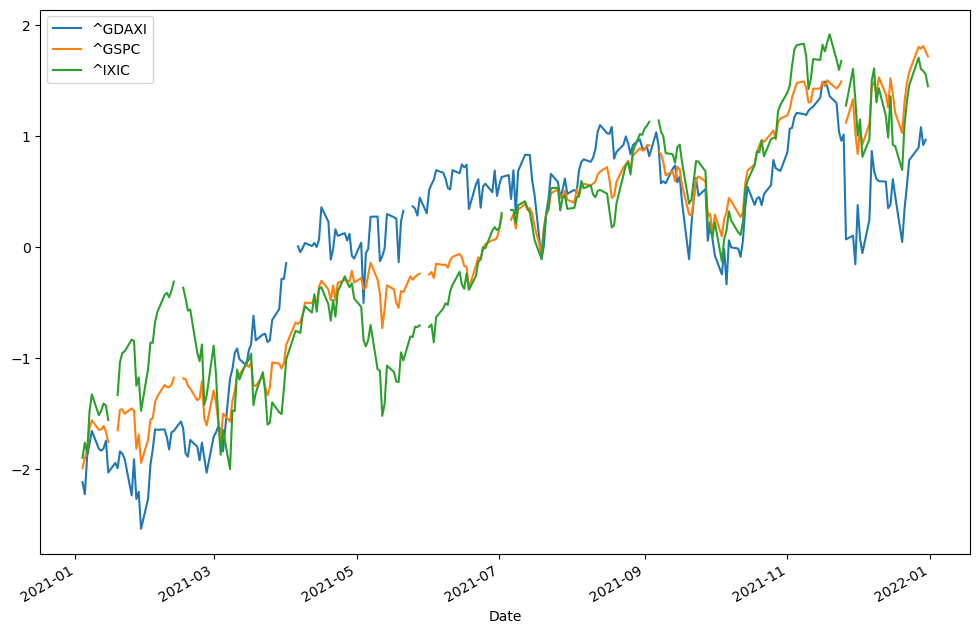

In [37]:
import matplotlib.pyplot as plt
# plot the index data scaled
index_data_scaled.plot(figsize=(12, 8))
plt.show()

